In [42]:
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('float_format', '{:f}'.format)

cost = { 'registry': [], 'size': [], 'storage_cost': [], 'egress_cost': [], 'total': []}
cost_dataframe = pd.DataFrame(data=cost)
registry_array = [('ecr', 'eu/na'),('ecr', 'sidney'), ('acr-basic', 'eu', 'basic'), ('acr-standard', 'eu', 'standard'), ('acr-premium', 'eu', 'premium'), ('gcr', 'eu'), ('docker-hub', "general"), ('quay.io', "general"), ('ibm', 'general')]

def calculate_egress(registry, size):
    if registry[0] == 'ecr':
        if registry[1] == 'eu/na':
            if size == 1:
                return 0
            if size < 10240:
                return size * 0.09
            if size < 51200:
                return 10239 * 0.09 + (size - 10239) * 0.085
            if size < 153600:
                return 10239 * 0.09 + 40960 * 0.085 + (size - 51199) * 0.07
            if size >= 153600:
                return 10239 * 0.09 + 40960 * 0.085 + (153599 - 51199) * 0.07 + (size - 153599) * 0.05
        if registry[1] == 'sidney':
            if size == 1:
                return 0
            if size < 10240:
                return size * 0.114
            if size < 51200:
                return 10239 * 0.114 + (size - 10239) * 0.098
            if size < 153600:
                return 10239 * 0.114 + 40960 * 0.098 + (size - 51199) * 0.094
            if size >= 153600:
                return 10239 * 0.114 + 40960 * 0.098 + (153599 - 51199) * 0.094 + (size - 153599) * 0.092
    if 'acr' in registry[0]:
        if registry[1] == 'eu':
            if size < 5:
                return 0
            if size < 10240:
                return size * 0.0717
            if size < 51200:
                return 10239 * 0.0717 + (size - 10239) * 0.0549
            if size < 153600:
                return 10239 * 0.0717 + 40960 * 0.0549 + (size - 51199) * 0.0506
            else:
                return 10239 * 0.0717 + 40960 * 0.0549 + 102400 * 0.0506 + (size - 153599) * 0.0422
    if registry[0] == 'gcr':
        if registry[1] == 'eu':
            if size < 1024:
                return size * 0.12
            if size < 10240:
                return 1023 * 0.12 + (size - 1023) * 0.11
            else:
                return 1023 * 0.12 + 9216 * 0.11 + (size - 10239) * 0.08
    if registry[0] == 'ibm':
        if size <= 5:
            return 0
        if size > 5:
            return (size - 5) * 0.08
    if registry[0] == 'docker-hub':
        return 140
    if registry[0] == 'quay.io':
        return 125
            
            

def calculate_storage(registry, size):
    if registry[0] == 'ecr':
        return size * 0.1
    if 'acr' in registry[0]:
        if registry[1] == 'eu':
            if registry[2] == 'basic':
                if size < 10:
                    return 5.01
                else:
                    return 5.01 + (size - 10) * 0.09
            if registry[2] == 'standard':
                if size < 100:
                    return 20.01
                else:
                    return 20.01 + (size - 100) * 0.09
            if registry[2] == 'premium':
                if size < 500:
                    return 50.01
                else:
                    return 50.01 + (size - 500) * 0.09
    if registry[0] == 'gcr':
        return size * 0.02 + ((size*10)/10000) * 0.05
    if registry[0] == 'ibm':
        return size * 0.05
    if registry[0] == 'quay.io' or registry[0] == 'docker-hub':
        return 0
            

for registry in registry_array:
    print(registry)
    for x in range(1, 204800, 100):
        egress = calculate_egress(registry, x)
        storage = calculate_storage(registry, x)
        cost_dataframe.loc[index] = [registry[0] + "-" + registry[1], x, storage, egress, storage + egress]
        index = index + 1
        
cost_dataframe

('ecr', 'eu/na')
('ecr', 'sidney')
('acr-basic', 'eu', 'basic')
('acr-standard', 'eu', 'standard')
('acr-premium', 'eu', 'premium')
('gcr', 'eu')
('docker-hub', 'general')
('quay.io', 'general')
('ibm', 'general')


,registry,size,storage_cost,egress_cost,total
0,ecr-eu/na,1.000000,0.100000,0.000000,0.100000
1,ecr-eu/na,101.000000,10.100000,9.090000,19.190000
2,ecr-eu/na,201.000000,20.100000,18.090000,38.190000
3,ecr-eu/na,301.000000,30.100000,27.090000,57.190000
4,ecr-eu/na,401.000000,40.100000,36.090000,76.190000
...,...,...,...,...,...
18427,ibm-general,204301.000000,10215.050000,16343.680000,26558.730000
18428,ibm-general,204401.000000,10220.050000,16351.680000,26571.730000
18429,ibm-general,204501.000000,10225.050000,16359.680000,26584.730000
18430,ibm-general,204601.000000,10230.050000,16367.680000,26597.730000


In [43]:
cost_dataframe_storage = cost_dataframe[['registry', 'size', 'storage_cost']]
cost_dataframe_storage[cost_dataframe_storage.registry == 'acr-premium-eu']

,registry,size,storage_cost
8192,acr-premium-eu,1.000000,50.010000
8193,acr-premium-eu,101.000000,50.010000
8194,acr-premium-eu,201.000000,50.010000
8195,acr-premium-eu,301.000000,50.010000
8196,acr-premium-eu,401.000000,50.010000
...,...,...,...
10235,acr-premium-eu,204301.000000,18392.100000
10236,acr-premium-eu,204401.000000,18401.100000
10237,acr-premium-eu,204501.000000,18410.100000
10238,acr-premium-eu,204601.000000,18419.100000


<Figure size 1080x720 with 0 Axes>

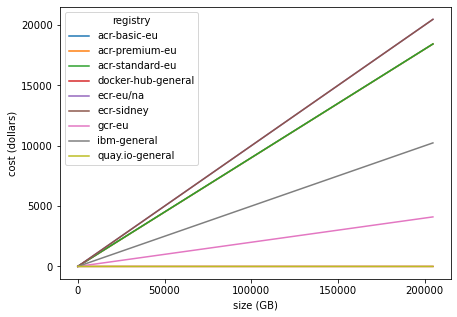

In [44]:
# fig, ax = plt.subplots(figsize=(15,7))
plt.figure(figsize=(15,10))
cost_dataframe_storage.groupby(['size', 'registry']).sum()['storage_cost'].unstack().plot.line(figsize=(7,5))
plt.ylabel('cost (dollars)')
plt.xlabel('size (GB)')
plt.savefig('plots/1hr/storage_cost.png')



<Figure size 432x288 with 0 Axes>

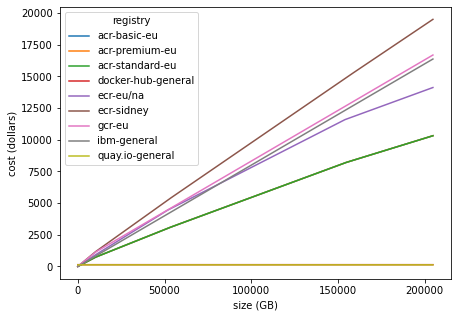

In [48]:
plt.figure()
cost_dataframe_egress = cost_dataframe[['registry', 'size', 'egress_cost']]
cost_dataframe_egress.groupby(['size', 'registry']).sum()['egress_cost'].unstack().plot.line(figsize=(7,5))
plt.ylabel('cost (dollars)')
plt.xlabel('size (GB)')
plt.savefig('plots/1hr/egress_cost.png')

<Figure size 432x288 with 0 Axes>

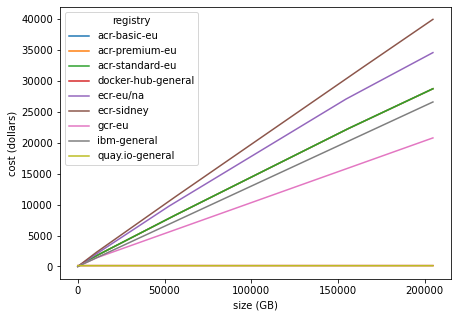

In [49]:
plt.figure()
cost_dataframe_total = cost_dataframe[['registry', 'size', 'total']]
cost_dataframe_total.groupby(['size', 'registry']).sum()['total'].unstack().plot.line(figsize=(7,5))
plt.ylabel('cost (dollars)')
plt.xlabel('size (GB)')
plt.savefig('plots/1hr/total_cost.png')